Импортируем необходимые библиотеки

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd            
import seaborn as sns           
import sklearn 

Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет

In [3]:
data_raw = pd.read_csv('water_potability.csv')

Размер таблицы

In [4]:
data_raw.shape

(3276, 10)

Выведем первые 7 элементов таблицы

In [5]:
data_raw.head(7)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0


In [6]:
data_raw['Potability'] = data_raw['Potability'].astype('category')

# Визуализация и описательная статистика

In [7]:
data_raw.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


Из таблицы видно, что количество элементов для разных столбцов различно, следовательно есть пропущенные элементы. Построим такие же таблицы для значений Potability = 1 и Potability = 0

In [8]:
data_raw[data_raw['Potability'] == 1].describe() # Potability = 1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


In [9]:
data_raw[data_raw['Potability'] == 0].describe() # Potability = 0

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


Значения для обеих таблиц очень схожи. Некоторые отличия есть в столбце Solids

# Работа с пропущенными значениями

In [10]:
data_raw.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Как видим, пропущенные значения есть в столбцах ph, sulfate, Trihalomethanes

Так как пропущенных значений достаточно много, нерационально просто выбросить их из рассмотрения. Заменим их средними значениями.

In [11]:
data_raw['ph'] = data_raw['ph'].fillna(data_raw['ph'].mean())
data_raw['Sulfate'] = data_raw['Sulfate'].fillna(data_raw['Sulfate'].mean())
data_raw['Trihalomethanes'] = data_raw['Trihalomethanes'].fillna(data_raw['Trihalomethanes'].mean())

In [12]:
data_raw.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

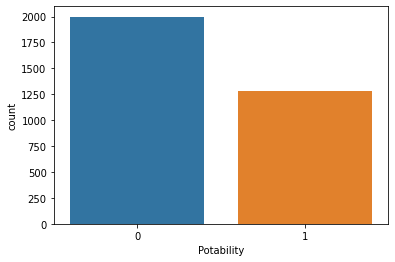

In [13]:
sns.countplot(x = 'Potability', data = data_raw)
pass

# Нормализация количественных признаков

In [14]:
df = X = data_raw.drop(['Potability'], axis=1)
data_stand = (df.astype(float) - df.mean(axis = 0))/data_raw.std(axis = 0)

In [15]:
data_stand.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-4.674052e-16,1.025906e-15,-4.554761e-17,5.205441e-16,1.591997e-15,1.756836e-16,1.735147e-17,1.713458e-16,5.552471e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.817011e+00,-4.529762e+00,-2.473966e+00,-4.276635e+00,-5.665771e+00,-3.027828e+00,-3.653077e+00,-4.163525e+00,-3.225068e+00
25%,-5.463578e-01,-5.936466e-01,-7.238810e-01,-6.284287e-01,-4.615366e-01,-7.481769e-01,-6.708163e-01,-6.181808e-01,-6.754064e-01
50%,-6.042211e-16,1.819146e-02,-1.238810e-01,5.067435e-03,3.145507e-15,-5.345119e-02,-2.014179e-02,0.000000e+00,-1.506775e-02
75%,5.369244e-01,6.173390e-01,6.065606e-01,6.270101e-01,4.595678e-01,6.877555e-01,6.869921e-01,6.512615e-01,6.836823e-01
max,4.707084e+00,3.855092e+00,4.472006e+00,3.793052e+00,4.074273e+00,4.047526e+00,4.236500e+00,3.652767e+00,3.552379e+00


# Разобьем выборку на тестовую и обучающую

Отведем 75% на обучающую выборку и 25% на тестовую

In [16]:
X = data_stand
y = data_raw['Potability']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2457, 819)

# Подбор оптимальной архитектуры

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
values = []
# for i in range(146, 153, 1):
for j in range(5, 20, 1):
    mlp_model = MLPClassifier(hidden_layer_sizes = (j,),
                      solver = 'lbfgs', 
                      activation = 'relu',
                      random_state = 42)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    if np.mean(y_test != y_test_pred) < 0.37:
        values.append([j,np.mean(y_test != y_test_pred)])

In [20]:
values

[[5, 0.32967032967032966],
 [6, 0.33821733821733824],
 [7, 0.3516483516483517],
 [8, 0.3235653235653236],
 [9, 0.3125763125763126],
 [10, 0.326007326007326],
 [11, 0.3540903540903541],
 [12, 0.34676434676434675],
 [13, 0.3418803418803419],
 [14, 0.34676434676434675],
 [15, 0.3504273504273504],
 [16, 0.3540903540903541],
 [17, 0.3540903540903541],
 [18, 0.3492063492063492],
 [19, 0.3333333333333333]]

Получаем, что оптимальным является один слой с 9 нейронами

# Подбор параметра регуляризации

In [21]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (9,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

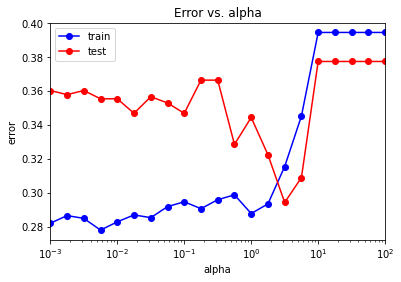

In [22]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

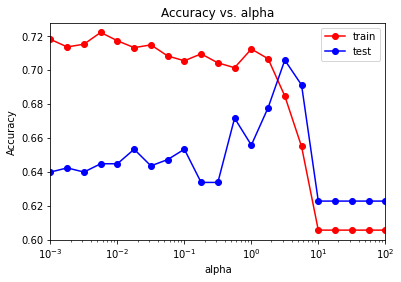

In [23]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

Минимальное значение ошибки

In [24]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.277981277981278 0.29426129426129427


Оптимальное значение alpha:

In [25]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[3.16227766]


In [26]:
mlp_model = MLPClassifier(alpha = 3.2, hidden_layer_sizes = (9,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)

In [27]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 216 ms


MLPClassifier(activation='logistic', alpha=3.2, hidden_layer_sizes=(9,),
              max_iter=1000, random_state=42, solver='lbfgs')

In [28]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [29]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.31746031746031744 0.2893772893772894


# Матрица рассогласования и другие метрики качества

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[459 186]
 [ 51 123]]


Видим, что у нас больше ошибок 1 рода (False positive) - 186 против 51 ошибки 2 рода

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       510
           1       0.71      0.40      0.51       309

    accuracy                           0.71       819
   macro avg       0.71      0.65      0.65       819
weighted avg       0.71      0.71      0.69       819



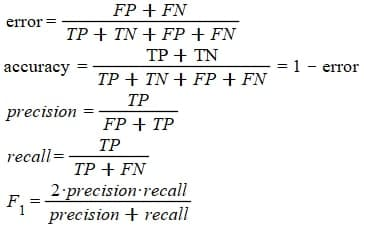